In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run Funciones_CSPSA_SPSA.ipynb
%matplotlib inline

In [2]:
# Ganancias estandar considerando posibles fluctuaciones de la energia

s = 0.602
t = 0.101
A = 0
#a = 3
b = 0.01

# Ganancias estandar sin fluctuaciones de la energia

#s = 0.602
#t = 0.101
#A = 0
#a = 3
#b = 0.01



# Ganancias asintoticas

#s = 1
#t = 0.166
#A = 0
#a = 3
#b = 0.01


#Ganancias estandar

#s = 0.602
#t = 0.101
#A = 0
#b = 0.1



In [3]:
d = 2
nu_par = 1
NU_IT = 500

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [4]:
psi_est = estado(d,nu_par)

#psi_bloch = est_bloch(psi_est)[0]
#phase = float(est_bloch(psi_est)[1])
#theta = float(est_bloch(psi_est)[2])

In [5]:
H = H_paul(A,B,C)

In [6]:
fun = lambda x : exp_H(x, H)

In [7]:
a_CSPSA = ganancia_a_CSPSA(psi_est,25,fun,t,b)
a_SPSA = ganancia_a_SPSA(psi_est,25,fun,t,b)
a_SPSA_ang = ganancia_a_SPSA_ang(psi_est,25,fun,t,b)

In [8]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [9]:
Result_CSPSA = CSPSA2(psi_est, NU_IT, fun, fun, s, t, A, b)

Result_CSPSA

array([[-2.59736309, -4.77426951, -4.77467584, -5.3025852 , -5.59973033,
        -5.73307926, -5.86275705, -5.90552032, -5.90836527, -5.90993867,
        -5.91468157, -5.91507991, -5.91533894, -5.91567189, -5.91571673,
        -5.91573011, -5.91582925, -5.91584795, -5.91589921, -5.91592534,
        -5.9159699 , -5.91597482, -5.91603431, -5.91605849, -5.91605857,
        -5.91605922, -5.91606707, -5.91606729, -5.91606798, -5.91607076,
        -5.91607104, -5.91607141, -5.91607542, -5.91607792, -5.91607792,
        -5.91607848, -5.91607855, -5.91607857, -5.9160789 , -5.91607892,
        -5.91607895, -5.91607897, -5.91607934, -5.91607945, -5.91607961,
        -5.91607964, -5.91607964, -5.91607964, -5.91607964, -5.91607967,
        -5.91607967, -5.91607968, -5.9160797 , -5.9160797 , -5.9160797 ,
        -5.9160797 , -5.9160797 , -5.91607971, -5.91607972, -5.91607973,
        -5.91607976, -5.91607976, -5.91607976, -5.91607976, -5.91607977,
        -5.91607977, -5.91607977, -5.91607978, -5.9

In [10]:
#Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [11]:
#Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A, b)

In [12]:
error_CSPSA = abs(Result_CSPSA - Ground_teo)
#error_SPSA = abs(Result_SPSA - Ground_teo)
#error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)
error_CSPSA

array([[3.31871669e+00, 1.14181027e+00, 1.14140394e+00, 6.13494587e-01,
        3.16349456e-01, 1.83000524e-01, 5.33227333e-02, 1.05594666e-02,
        7.71451268e-03, 6.14111729e-03, 1.39821509e-03, 9.99873993e-04,
        7.40847633e-04, 4.07896587e-04, 3.63056126e-04, 3.49669823e-04,
        2.50536529e-04, 2.31830687e-04, 1.80569307e-04, 1.54444102e-04,
        1.09887385e-04, 1.04968041e-04, 4.54715312e-05, 2.12920798e-05,
        2.12119925e-05, 2.05648532e-05, 1.27179637e-05, 1.24939229e-05,
        1.17988717e-05, 9.02806061e-06, 8.74431912e-06, 8.37648415e-06,
        4.36192430e-06, 1.86033801e-06, 1.86413659e-06, 1.30056496e-06,
        1.23313310e-06, 1.20850723e-06, 8.79571039e-07, 8.62554423e-07,
        8.32883424e-07, 8.12827429e-07, 4.41257277e-07, 3.35778752e-07,
        1.77156846e-07, 1.42228877e-07, 1.43062784e-07, 1.38894880e-07,
        1.38966356e-07, 1.13941621e-07, 1.08263116e-07, 1.04845837e-07,
        8.57476872e-08, 8.39059444e-08, 8.24671966e-08, 8.073461

In [13]:
#plt.loglog(np.array(error_CSPSA[:]).T, label='CSPSA')
#plt.loglog(np.array(error_SPSA[:]).T, label='SPSA')
#plt.loglog(np.array(error_SPSA_ang[:]).T, label='SPSA_ang')
#plt.legend()

In [14]:
#plt.plot(np.array(Result_SPSA[:]).T)
#plt.loglog(np.array(error_SPSA[:]).T)

In [15]:
#plt.plot(np.array(Result_SPSA_ang[:]).T)
#plt.loglog(np.array(error_SPSA_ang[:]).T)

In [16]:
#plt.plot(np.array(Result_SPSA_ang[:]).T, label='SPSA_ang')
#plt.plot(np.array(Result_CSPSA[:]).T,label='CSPSA')
#plt.xlim(0,100)
#plt.ylim(-7,-4)
#plt.legend()

In [17]:
# numero de realizaciones para apromediar

num = 5


x = range(0,num)
y = len(x)


psi_est_ar = np.empty((y,d,1), dtype=np.clongdouble)
Result_CSPSA_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)
Result_SPSA_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)
Result_SPSA_ang_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)
error_CSPSA_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)
error_SPSA_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)
error_SPSA_ang_ar = np.empty((y,1,NU_IT), dtype=np.longdouble)


In [18]:
# Crear ensamble de estados inciales

for i in x:
    psi_est_ar[i] = estado(d,nu_par)

In [19]:
def multiprocessing_func(i):
    Result_CSPSA_ar[i] = CSPSA2(psi_est_ar[i], NU_IT, fun, fun, s, t, A, b)
    Result_SPSA_ar[i] = SPSA2(psi_est_ar[i], NU_IT, fun, fun, s, t, A, b)
    Result_SPSA_ang_ar[i] = SPSA_ang2(psi_est_ar[i], NU_IT, fun, fun, s, t, A, b)
    
    error_CSPSA_ar[i] = abs(Result_CSPSA_ar[i] - Ground_teo)
    error_SPSA_ar[i] = abs(Result_SPSA_ar[i] - Ground_teo)
    error_SPSA_ang_ar[i] = abs(Result_SPSA_ang_ar[i] - Ground_teo)

In [20]:
for i in x: 
    multiprocessing_func(i)
    

In [21]:
Result_CSPSA_ar[0]

array([[-0.88559861, -5.77311303, -5.77333044, -5.77338111, -5.79659442,
        -5.79700083, -5.87177333, -5.87219797, -5.8769607 , -5.87709687,
        -5.91088119, -5.91269721, -5.91513826, -5.91555668, -5.91560677,
        -5.91562181, -5.91575975, -5.9158445 , -5.91592471, -5.91601549,
        -5.91602802, -5.91603601, -5.91604892, -5.91604928, -5.91605353,
        -5.91605596, -5.91606179, -5.91606203, -5.91606203, -5.91606724,
        -5.91606847, -5.91607413, -5.91607445, -5.91607756, -5.9160776 ,
        -5.91607761, -5.91607769, -5.91607777, -5.9160778 , -5.91607787,
        -5.91607788, -5.91607823, -5.91607851, -5.91607917, -5.91607948,
        -5.91607948, -5.91607962, -5.9160797 , -5.91607971, -5.91607974,
        -5.91607975, -5.91607975, -5.91607977, -5.91607977, -5.91607977,
        -5.91607977, -5.91607977, -5.91607977, -5.91607977, -5.91607977,
        -5.91607977, -5.91607977, -5.91607977, -5.91607978, -5.91607978,
        -5.91607978, -5.91607978, -5.91607978, -5.9

In [22]:
Result_CSPSA_pro = np.sum(Result_CSPSA_ar, axis=0)/y
Result_SPSA_pro = np.sum(Result_SPSA_ar, axis=0)/y
Result_SPSA_ang_pro = np.sum(Result_SPSA_ang_ar, axis=0)/y
error_CSPSA_pro = np.sum(error_CSPSA_ar, axis=0)/y
error_SPSA_pro = np.sum(error_SPSA_ar, axis=0)/y
error_SPSA_ang_pro = np.sum(error_SPSA_ang_ar, axis=0)/y


In [23]:
#plt.loglog(np.array(error_CSPSA_pro[:]).T)

In [24]:
#plt.loglog(np.array(error_SPSA_pro[:]).T)

In [25]:
#plt.loglog(np.array(error_SPSA_ang_pro[:]).T)

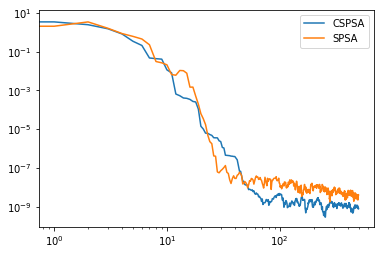

In [26]:
plt.loglog(np.array(error_CSPSA_pro[:]).T, label='CSPSA')
plt.loglog(np.array(error_SPSA_pro[:]).T, label='SPSA')
#plt.loglog(np.array(error_SPSA_ang_pro[:]).T, label='SPSA_ang')
plt.legend()

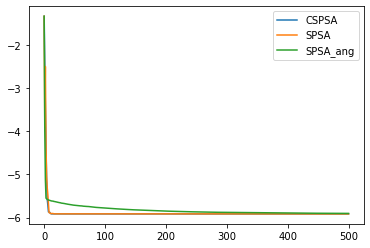

In [27]:
plt.plot(np.array(Result_CSPSA_pro[:]).T,label='CSPSA')
plt.plot(np.array(Result_SPSA_pro[:]).T, label='SPSA')
plt.plot(np.array(Result_SPSA_ang_pro[:]).T, label='SPSA_ang')

#plt.xlim(0,90)
#plt.ylim(-6.5,-4)
plt.legend()

In [28]:
#np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
#print(Result_SPSA)

In [29]:
#np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
#print(Result_CSPSA)

In [30]:
#np.savetxt('prueba.txt', Result_SPSA_ang, delimiter=',')
#print(Result_SPSA_ang)